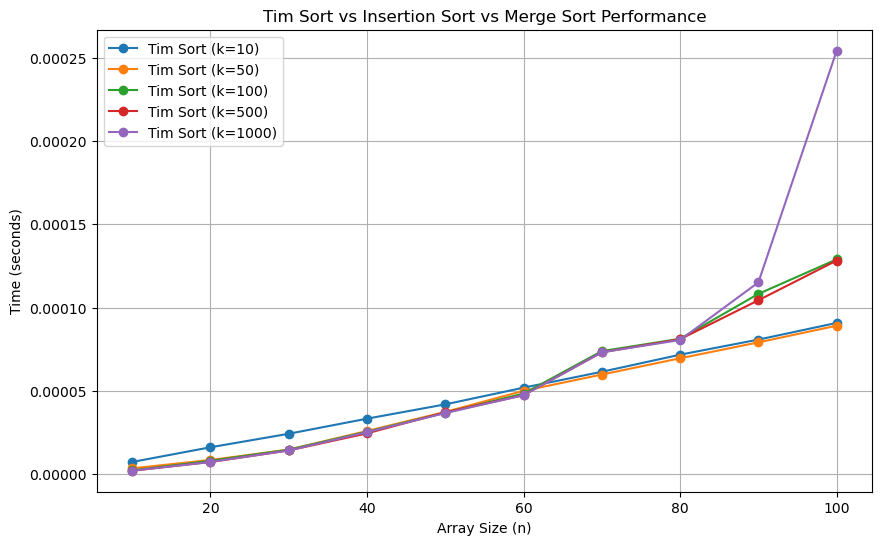

In [17]:
import time
import random
import matplotlib.pyplot as plt

# Hybrid Tim Sort implementation (Merge Sort with Insertion Sort for small arrays)
def insertion_sort(arr, k=0):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sort(arr, k=0):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

# Hybrid Tim Sort implementation
def tim_sort(arr, k):
    # Hybrid: use Insertion Sort for small subarrays, Merge Sort for larger ones
    if len(arr) <= k:
        insertion_sort(arr)
    else:
        merge_sort(arr)

def time_sorting_algorithm(sort_function, arr, k=0):
    start_time = time.time()
    sort_function(arr, k)  # Pass k for Tim Sort
    end_time = time.time()
    return end_time - start_time

# Test and benchmark Tim Sort with varying values of k
array_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
k_values = [10, 50, 100, 500, 1000]  # Range of k to experiment with
tim_sort_times = {k: [] for k in k_values}
merge_sort_times = []
insertion_sort_times = []
    
# Run the tests
for size in array_sizes:
    random_array = [random.randint(1, 10000) for _ in range(size)]
    
    for k in k_values:
        tim_sort_times[k].append(time_sorting_algorithm(tim_sort, random_array[:], k))
    # Time Merge Sort
    merge_sort_times.append(time_sorting_algorithm(merge_sort, random_array[:]))
    
    # Time Insertion Sort
    insertion_sort_times.append(time_sorting_algorithm(insertion_sort, random_array[:]))

plt.figure(figsize=(10, 6))

for k in k_values:
    plt.plot(array_sizes, tim_sort_times[k], label=f"Tim Sort (k={k})", marker='o')

plt.xlabel("Array Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Tim Sort vs Insertion Sort vs Merge Sort Performance")
plt.legend()
plt.grid(True)
plt.show()


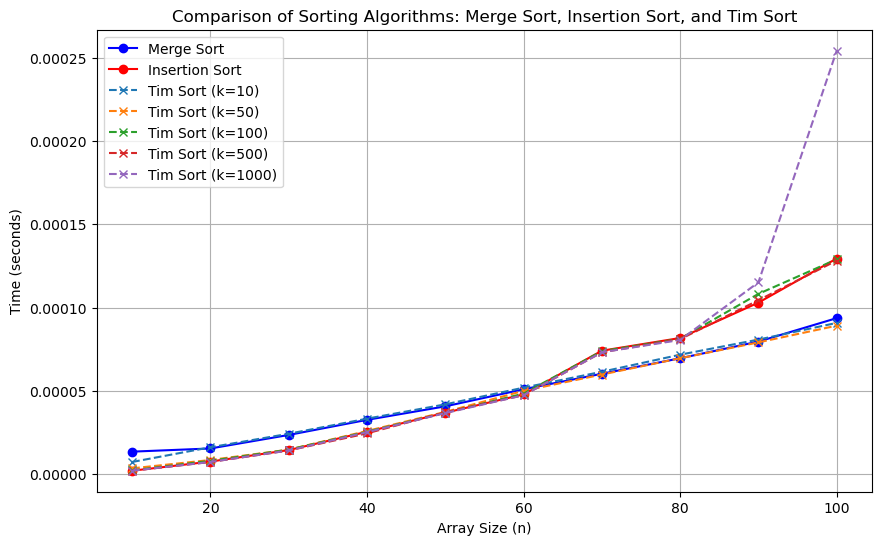

In [18]:
# Plotting results
plt.figure(figsize=(10, 6))

# Plot Merge Sort
plt.plot(array_sizes, merge_sort_times, label="Merge Sort", marker='o', linestyle='-', color='blue')

# Plot Insertion Sort
plt.plot(array_sizes, insertion_sort_times, label="Insertion Sort", marker='o', linestyle='-', color='red')

# Plot Tim Sort for different k values
for k in k_values:
    plt.plot(array_sizes, tim_sort_times[k], label=f"Tim Sort (k={k})", marker='x', linestyle='--')

# Labels and title
plt.xlabel("Array Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Comparison of Sorting Algorithms: Merge Sort, Insertion Sort, and Tim Sort")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()